## Excercise 1

### 1.1 Excercise 1a
Encode the following numbers using the basis encoding pattern:
• 2,
• 3,
• 5,
• 7,
• 11,
• 13,
• 17,
• 19,
• 23,

In [ ]:
from qiskit import QuantumCircuit
 
# Data point to encode
a = 2
b = 3
c = 5
d = 7
e = 11
f = 13
g = 13
h = 17
i = 19
j = 23
 
# Convert each to 4-bit binary list
a_bits = [int(bit) for bit in format(a, "05b")]
b_bits = [int(bit) for bit in format(b, "05b")]
c_bits = [int(bit) for bit in format(c, "05b")]
d_bits = [int(bit) for bit in format(d, "05b")]
e_bits = [int(bit) for bit in format(e, "05b")]
f_bits = [int(bit) for bit in format(f, "05b")]
g_bits = [int(bit) for bit in format(g, "05b")]
h_bits = [int(bit) for bit in format(h, "05b")]
i_bits = [int(bit) for bit in format(i, "05b")]
j_bits = [int(bit) for bit in format(j, "05b")]

# Combine all bits
all_bits = a_bits + b_bits + c_bits + d_bits + e_bits + f_bits + g_bits + h_bits + i_bits + j_bits
 
# Initialize a quantum circuit with one qubit per bit
qc = QuantumCircuit(len(all_bits))
 
# Apply x-gates where the bit is 1
for idx, bit in enumerate(all_bits):
    if bit == 1:
        qc.x(idx)
 
qc.draw("mpl")

### Assigment 1.2b

*How would you encode a negative number?*

By using 1 bit to represent the property of the byte, if the first bit is 0, it would be negative, but if it's 1, the byte would be positive.

### 1.3 Excercise 1c

*Is it possible to encode multiple numbers in one go?*

It's possible because you can concatinate multiple numbers using their binary form.
E.g. 3 -> 011 and 5 -> 101, so the combined state would be |011101>, so this is still one basis state, but it contains multiple numbers.

### Excercise 1d
*All the encoding is from decimal to quantum. Make also an uncompute,
i.e. from quantum to decimal.*

Encoding step:
5 -> 101 -> |101>

if the state on the QC is |101> you'll get 101 after the measurement.

so if you measure you'll get |101> --measure-> 101 --Binary to Decimal-> 5


## 2 Angle Encoding

### Excercise 1a

*Encode the following numbers using the angle encoding pattern:
• 29,
• 31,
• 37,
• 41,
• 43,
• 47,
• 53,
• 59*

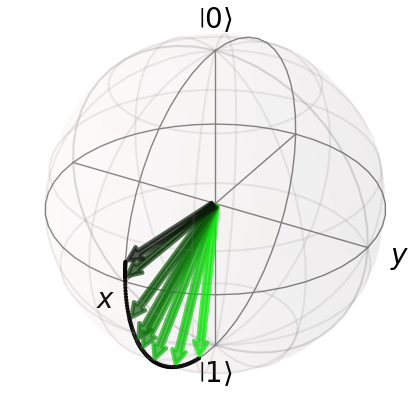

In [8]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from math import pi
import numpy as np
from qiskit.visualization.bloch import Bloch
from qiskit.visualization.state_visualization import _bloch_multivector_data

# Values to encode
values = [29, 31, 37, 41, 43, 47, 53, 59]

# Angle encoding: theta = pi * x / 63
def angle_encode(x):
    return pi * x / 63

# Build a Statevector for each encoded value (single-qubit Ry rotation)
states = []
for x in values:
    qc = QuantumCircuit(1)
    qc.ry(angle_encode(x), 0)
    states.append(Statevector.from_instruction(qc))

def plot_Nstates(states, axis, plot_trace_points=True):
    """This function plots N states to 1 Bloch sphere"""
    bloch_vecs = [_bloch_multivector_data(s)[0] for s in states]

    if axis is None:
        bloch_plot = Bloch()
    else:
        bloch_plot = Bloch(axes=axis)

    bloch_plot.add_vectors(bloch_vecs)

    if len(states) > 1:

        def rgba_map(x, num):
            g = (0.95 - 0.05) / (num - 1)
            i = 0.95 - g * num
            y = g * x + i
            return (0.0, y, 0.0, 0.7)

        num = len(states)
        bloch_plot.vector_color = [rgba_map(x, num) for x in range(1, num + 1)]

    bloch_plot.vector_width = 3
    bloch_plot.vector_style = "simple"

    if plot_trace_points:

        def trace_points(bloch_vec1, bloch_vec2):
            # bloch_vec = (x,y,z)
            n_points = 15
            thetas = np.arccos([bloch_vec1[2], bloch_vec2[2]])
            phis = np.arctan2(
                [bloch_vec1[1], bloch_vec2[1]], [bloch_vec1[0], bloch_vec2[0]]
            )
            if phis[1] < 0:
                phis[1] = phis[1] + 2 * pi
            angles0 = np.linspace(phis[0], phis[1], n_points)
            angles1 = np.linspace(thetas[0], thetas[1], n_points)

            xp = np.cos(angles0) * np.sin(angles1)
            yp = np.sin(angles0) * np.sin(angles1)
            zp = np.cos(angles1)
            pnts = [xp, yp, zp]
            bloch_plot.add_points(pnts)
            bloch_plot.point_color = "k"
            bloch_plot.point_size = [4] * len(bloch_plot.points)
            bloch_plot.point_marker = ["o"]

        for i in range(len(bloch_vecs) - 1):
            trace_points(bloch_vecs[i], bloch_vecs[i + 1])

    bloch_plot.sphere_alpha = 0.05
    bloch_plot.frame_alpha = 0.15
    bloch_plot.figsize = [4, 4]

    bloch_plot.render()

plot_Nstates(states, axis=None, plot_trace_points=True)

### Excercise 2.1

*How would you encode a negative number?*

By adding another bit on the that represents the state, 1 = negative and 0 = positive.
Then invert the number. So if i choose 10, 10 = 01010 then invert the bits and add 1 on the right, so that would be 10101 + 1 => 10110 => -10.

### Excercise 2.2

*Is it possible to encode multiple numbers in one go?*

No:

Each feature value is mapped to a corresponding qubit leaving the qubits in a product state.
So, one numerical value is encoded at a time, rather than a whole set of features from a data point.

https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning/data-encoding#angle-encoding

### Excercise 2.3

*All the encoding is from decimal to quantum. Make also an uncompute,
i.e. from quantum to decimal*

In [9]:
from qiskit import QuantumCircuit
from math import acos, pi
from qiskit_aer import AerSimulator

shots = 4000
backend = AerSimulator()

def angle_encode(x): return pi * x / 63

def estimate_x_from_Ry(theta):
    qc = QuantumCircuit(1, 1)
    qc.ry(theta, 0)
    qc.measure(0, 0)
    job = backend.run(qc, shots=shots)
    counts = job.result().get_counts()
    p0 = counts.get("0", 0) / shots
    p1 = counts.get("1", 0) / shots
    expZ = p0 - p1
    theta_est = acos(max(-1.0, min(1.0, expZ)))  # numeric safety
    x_est = round(theta_est * 63 / pi)
    return x_est, theta_est, expZ

values = [29, 31, 37, 41, 43, 47, 53, 59]
for x in values:
    x_hat, theta_hat, z = estimate_x_from_Ry(angle_encode(x))
    print(x, "->", x_hat, " theta_est=", theta_hat, " z=", z)

29 -> 29  theta_est= 1.4550379730307406  z= 0.11549999999999999
31 -> 31  theta_est= 1.556295818642651  z= 0.014499999999999957
37 -> 37  theta_est= 1.832265429407986  z= -0.25849999999999995
41 -> 41  theta_est= 2.0353233562140653  z= -0.44799999999999995
43 -> 43  theta_est= 2.147185441531094  z= -0.5449999999999999
47 -> 47  theta_est= 2.3309047084628545  z= -0.6890000000000001
53 -> 53  theta_est= 2.641420470684818  z= -0.8775
59 -> 59  theta_est= 2.9624678387109036  z= -0.984
